In [8]:
import scipy.stats as smt
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pop_mean = 1000
s = 50
s_mean = 980
p_s = 50

z_test = (s_mean - pop_mean)/(p_s/np.sqrt(s))
z_test


np.float64(-2.8284271247461903)

In [ ]:
p_mean = 12
s = [11,13,12,10,14,12,13,11,12,13]
n = len(s)
s_mean = np.mean(s)
s_std = 

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [5]:
df = sns.load_dataset("tips")

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [8]:
np.median(df['total_bill'])

np.float64(17.795)

In [10]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

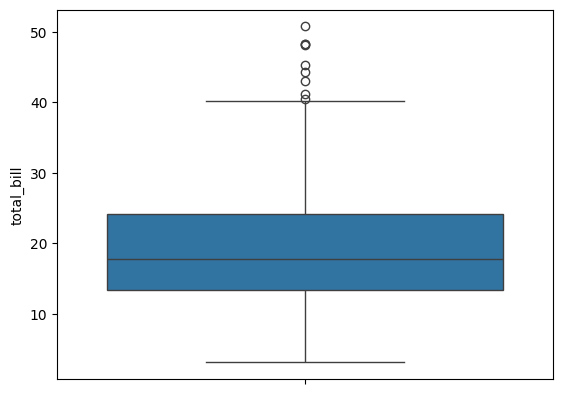

In [11]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

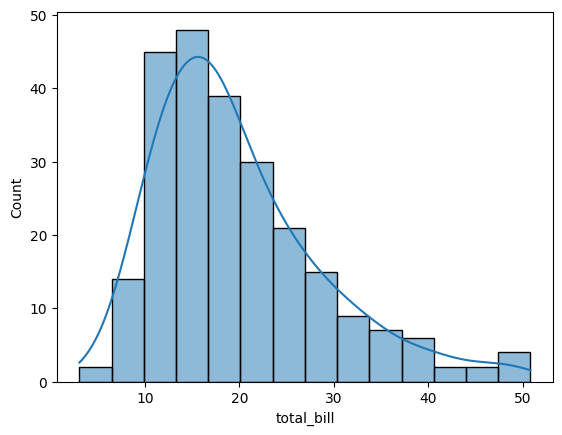

In [13]:
sns.histplot(df['total_bill'],kde = True)

In [15]:
df1 = sns.load_dataset('iris')

In [16]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

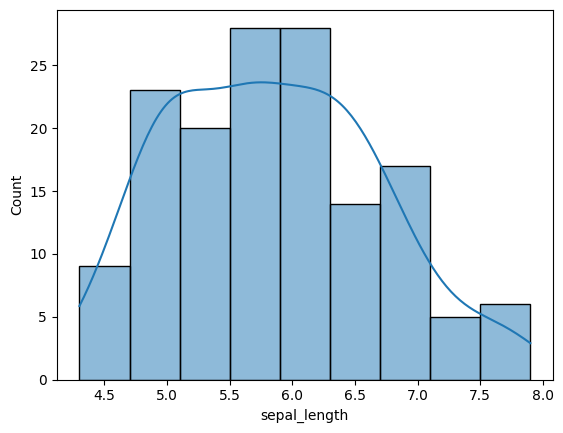

In [19]:
sns.histplot(df1['sepal_length'],kde = True)

<Axes: xlabel='sepal_width', ylabel='Count'>

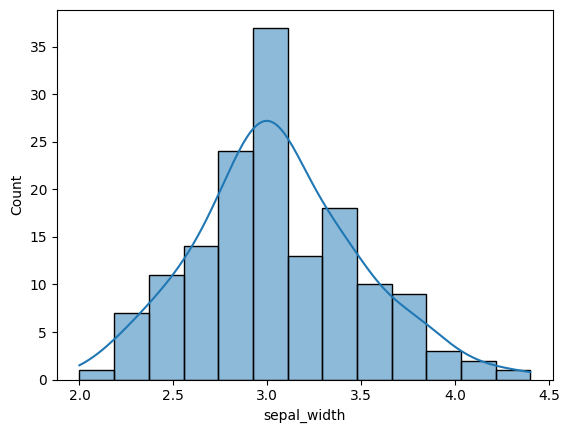

In [21]:
sns.histplot(df1['sepal_width'],kde = True)

<Axes: xlabel='count', ylabel='species'>

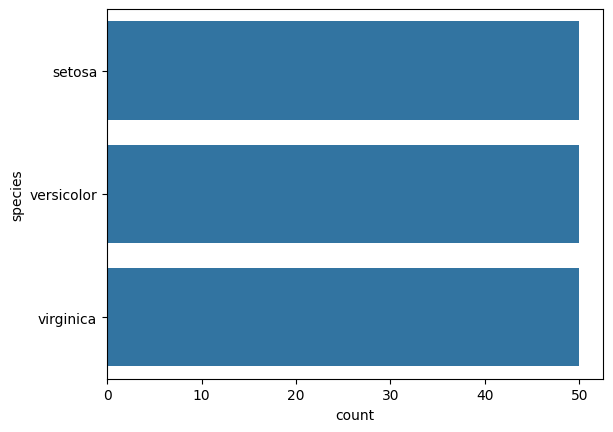

In [26]:
sns.countplot(df1['species'])

In [28]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

# Outliers

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
dataset = [11,10,12,14,12,15,14,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

## Z_score computation for outliers

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

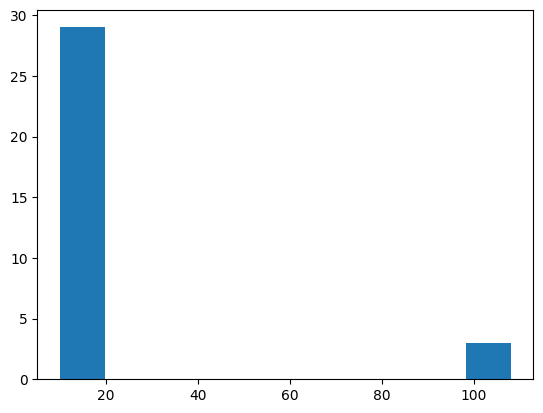

In [24]:
plt.hist(dataset)

In [25]:
outliers = []
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)

    return outliers

In [26]:
detect_outlier(dataset)

[107, 108]

## IQR
1. sort the data
2. calculate Q1 and Q3
3. IQR (Q3-Q1)
4. find the lower fence(Q1-1.5(iqr))
5. find the upper fence(Q3+1.5(iqr))

In [28]:
sort_dataset = sorted(dataset)
sort_dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [31]:
Q1,Q3 = np.percentile(dataset,[25,75])

In [32]:
print(Q1,Q3)

12.0 15.0


In [34]:
iqr = Q3-Q1
iqr

np.float64(3.0)

In [35]:
lower_fence = Q1-(1.5*iqr)
lower_fence

np.float64(7.5)

In [36]:
upper_fence = Q3+(1.5*iqr)
upper_fence

np.float64(19.5)

<Axes: >

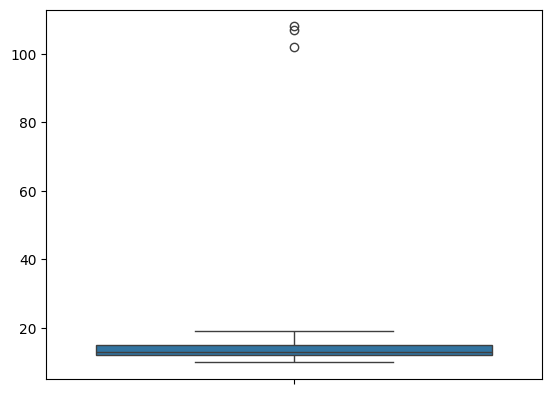

In [39]:
sns.boxplot(dataset)

# Hypothesis Testing

## T test

In [1]:
#  Scenario:  
# A teacher claims that the average score of students is 75.  
# We want to test this using a sample of scores.

import scipy.stats as stats

# Sample data (e.g. student scores)
scores = [72, 78, 74, 80, 69, 77, 73, 75, 71, 79]

# Step 1: Define population mean
population_mean = 75

# Step 2: Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(scores, population_mean)

# Step 3: Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Step 4: Decide based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀). Significant difference found.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

T-statistic: -0.17349447958987455
P-value: 0.8661022007175908
Fail to reject the null hypothesis. No significant difference.


In [2]:
# You want to compare the average scores of Group A (e.g. males) and Group B (e.g. females).
import scipy.stats as stats

# Sample data
group_A = [72, 75, 78, 70, 74, 77, 76]
group_B = [68, 71, 73, 69, 72, 70, 74]

# Two-sample (independent) t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a significant difference between the two groups.")
else:
    print("Fail to reject H₀: No significant difference found.")



T-statistic: 2.6599758829946563
P-value: 0.02079234311114272
Reject H₀: There is a significant difference between the two groups.


## Chi-Square Test (for Categorical Data)

In [6]:
# Scenario: Are gender and preferred device type related?

import pandas as pd
import scipy.stats as stats

# Sample data (contingency table)
data = pd.DataFrame({
    'Mobile': [20, 15],
    'Laptop': [30, 35]
}, index=['Male', 'Female'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-square:", chi2)
print("P-value:", p)


Chi-square: 0.7032967032967032
P-value: 0.4016781664697727


##  ANOVA (for 3+ Groups)

In [3]:
from scipy.stats import f_oneway

class_A = [70, 75, 80, 72]
class_B = [68, 74, 77, 73]
class_C = [65, 69, 71, 70]

f_stat, p_val = f_oneway(class_A, class_B, class_C)

print("F-statistic:", f_stat)
print("P-value:", p_val)



F-statistic: 2.50418410041841
P-value: 0.13656748915009553


## P-value

In [8]:
from scipy.stats import ttest_1samp

# Sample student scores
scores = [68, 72, 70, 69, 71, 67, 70, 73, 69, 70]

# Test if mean = 75
t_stat, p_val = ttest_1samp(scores, 75)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: The average score is significantly different from 75.")
else:
    print("Fail to reject H₀: No significant difference found.")


T-statistic: -8.99999999999999
P-value: 8.538051223166346e-06
Reject H₀: The average score is significantly different from 75.


# Z-test test

suppose the IQ in a certain population is normally distributed with mean of 100 and std of 15.
A reasercher wants to know if a new drig affects IQ level, so he recruits 20 patients to try it and records their IQ levels.
The following code shows how to perform a one sample z test in python to determine if the new drug causes a significant differnce in IQ levels.

In [2]:
from statsmodels.stats.weightstats import ztest as ztest
data = [88,92,94,96,97,97,99,99,105,109,109,110,112,112,113,114,115]
ztest(data,value = 100)

(np.float64(1.6900489910108805), np.float64(0.09101858238481254))

# t-tst

In [25]:
import numpy as np
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
ages_mean = np.mean(ages)
ages_mean

np.float64(30.34375)

In [26]:
sample_size = 10
ages_sample = np.random.choice(ages,sample_size)
ages_sample

array([16, 16, 14, 43, 18, 30, 18, 70, 35, 18])

In [27]:
np.mean(ages_sample)

np.float64(27.8)

In [28]:
from scipy.stats import ttest_1samp
ttest_1samp(ages_sample,30)

TtestResult(statistic=np.float64(-0.3926346239251826), pvalue=np.float64(0.7037264337837337), df=np.int64(9))

In [29]:
# consider another example 
# ages of the college students(population)
# 1_class student mean of all ages

import numpy as np
import pandas as pd
import scipy.stats as stats
import math

In [30]:
np.random.seed(6)
school_ages = stats.poisson.rvs(loc = 18, mu = 35, size= 1500)
class_A_ages= stats.poisson.rvs(loc=18,mu=30,size=60)

In [31]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], shape=(1500,))

In [32]:
class_A_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [33]:
class_A_ages.mean()

np.float64(46.9)

In [34]:
school_ages.mean()

np.float64(53.303333333333335)

In [35]:
_, p_value = ttest_1samp(class_A_ages,school_ages.mean())

In [36]:
if p_value<0.05:
    print("Reject H0")
else:
    print("Accept H0")

Reject H0


In [23]:
import seaborn as sns

In [6]:
df = sns.load_dataset("Iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df = df.drop('species' ,axis = True)

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


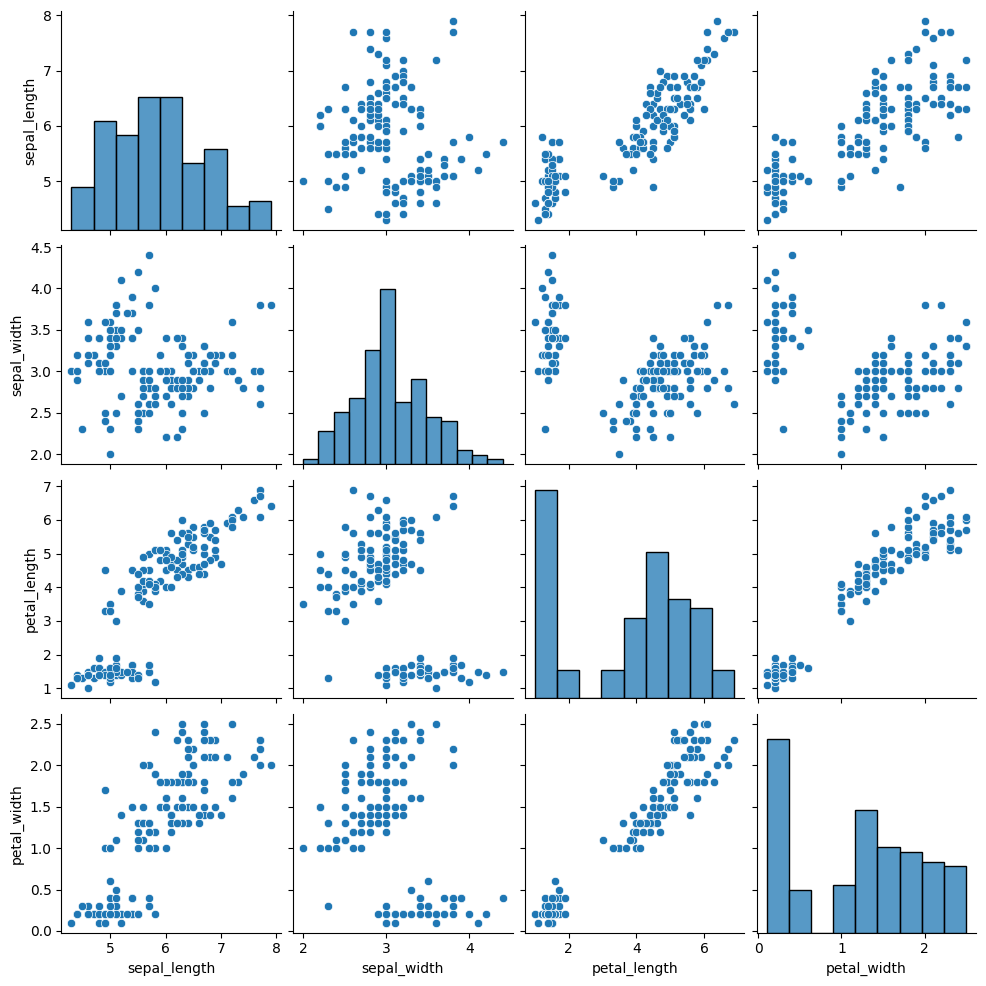

In [10]:
sns.pairplot(df)